**Vehicle Routing Problem**

In [2]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries
!pip install matplotlib deap
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [3]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 7

locations = [(random.randint(0,100), random.randint(0,100)) for _ in range(num_locations)]
depot = [25,25]

num_vehicles = 4
print(locations)

[(5, 71), (53, 58), (93, 40), (93, 97), (81, 24), (24, 89), (37, 43)]


In [4]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", base.Fitness, weights=(-1,-1))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [5]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [6]:
# TASK 5 and 6

def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = 0
        for j in range(len(vehicle_route) - 1):
          vehicle_distance += np.linalg.norm(np.array(vehicle_route[j]) - np.array(vehicle_route[j+1]))

        # Calculate total distance traveled by this vehicle


        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)



#TASK 6 - Register the evaluate function in the toolbox


In [7]:

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [8]:
#  TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	342.013	23.6855
1  	217   	334.14 	23.6855
2  	230   	329.919	23.6855
3  	245   	326.654	23.6855
4  	212   	323.763	24.16  
5  	233   	324.41 	23.6855
6  	232   	322.46 	23.6855
7  	229   	320.226	24.16  
8  	226   	319.165	27.1071
9  	230   	313.985	25.2355
10 	240   	311.742	26.6422
11 	238   	316.721	26.6422
12 	237   	310.369	24.9352
13 	217   	305.505	31.077 
14 	235   	305.621	23.6855
15 	233   	305.227	27.9453
16 	210   	300.664	24.9352
17 	239   	301.173	31.077 
18 	231   	300.87 	27.9453
19 	208   	301.672	31.077 
20 	234   	302.485	27.9453
21 	218   	299.014	26.6422
22 	221   	298.587	35.2027
23 	224   	298.107	31.8164
24 	223   	298.654	27.9453
25 	228   	299.89 	27.1444
26 	231   	298.52 	30.3795
27 	236   	299.74 	31.077 
28 	230   	297.676	31.077 
29 	235   	297.379	25.2355
30 	237   	296.79 	23.6855
31 	221   	294.836	27.9453
32 	236   	295.153	31.8164
33 	216   	294.123	31.077 
34 	232   	293.045	27.9453
35 	240   	294.113	27.9453
3

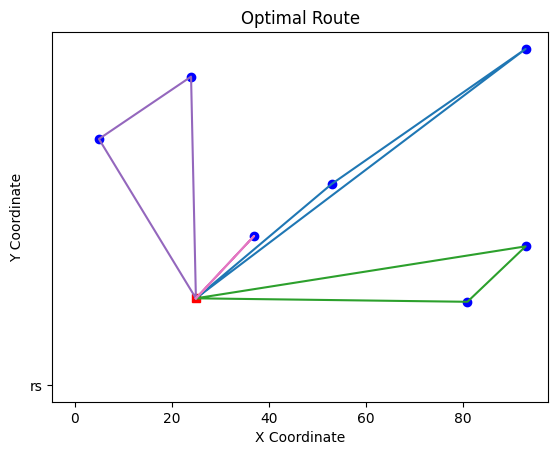

Best individual: [1, 2, 5, 6, 3, 4, 0]
Fitness: (527.4297942310461, 55.921721779985354)


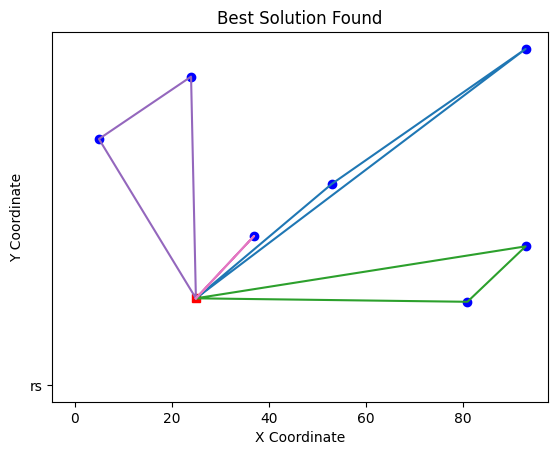

In [9]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results
    pop, stats, hof = main()
    best_individual = hof[0]
    print("Best individual:", best_individual)
    print("Fitness:", best_individual.fitness.values)
    plot_routes( best_individual,"Best Solution Found")